# Clustering Mixed data

#### Author - Ryan Kemmer

This notebook shows 2 different methods of how to clutser mixed data in python.

## Create dataset

To begin, we are going to create a fake datatset called "customers", that has 4 features: operating system, ISP, age, and time spent. 

In [124]:
#create dataset
import numpy as np 
import pandas as pd

operating_systems = ["Android","iOS"]
isp_names = ["Cox","HughesNet","Xfinity","AT&T"]

data = []
for i in range(100):
    row = []
    row.append(np.random.choice(operating_systems))
    row.append(np.random.choice(isp_names))
    row.append(np.random.poisson(lam=25))
    row.append(np.random.uniform(low=0.5, high=1000))
    data.append(row)

customers = pd.DataFrame(data, columns = ['OS', 'ISP','Age','Time Spent']) 

In [125]:
customers.head()

,OS,ISP,Age,Time Spent
0,Android,Cox,30,556.818709
1,Android,Xfinity,19,996.303312
2,Android,AT&T,20,864.063922
3,iOS,Xfinity,33,617.564914
4,iOS,AT&T,29,74.853883


## Preprocess data

Next, we are going to normalize the continuos features to ensure that one feature is not interpreted as being more important than others. 

In [126]:
from sklearn import preprocessing

customers_norm = customers.copy()
scaler = preprocessing.MinMaxScaler()
customers_norm[['Age','Time Spent']] = scaler.fit_transform(customers_norm[['Age','Time Spent']])

## Clustering method 1: K-prototypes

Cluster data using the k-prototypes algorithm and visualize the results

In [127]:
from kmodes.kprototypes import KPrototypes

kproto = KPrototypes(n_clusters=3, init='Cao')

clusters = kproto.fit_predict(customers_norm, categorical=[0, 1])
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((customers,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

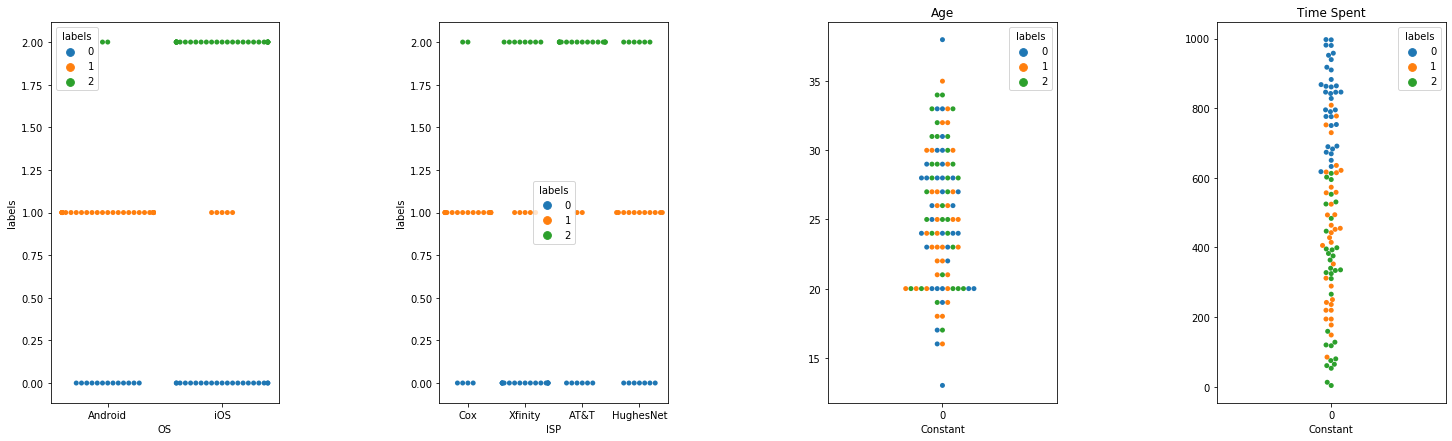

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

labeledCustomers['Constant'] = 0 #dummy feature for plotting

f, axes = plt.subplots(1, 4, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

for i in range(4):
    col = labeledCustomers.columns[i]
    if i < 2:    
        sns.catplot(x=col, y='labels', kind="swarm", hue='labels', data=labeledCustomers,ax=axes[i])
    else:
        ax = sns.swarmplot(x=labeledCustomers['Constant'],y=labeledCustomers[col].values,hue=labeledCustomers['labels'],ax=axes[i])
        ax.set_title(col)
        
plt.close(2)
plt.close(3)
plt.show()

## Clustering method 2: K-means with one hot encoding

Cluster data using the k-means algorithm. 

The k-means algorithm only works with continuos values. We start be one hot encoding our categorical features. 

In [129]:
customers_norm = pd.get_dummies(customers_norm, columns=["OS","ISP"])

In [130]:
from sklearn.cluster import KMeans

kmeans = KMeans(3)
clusters = kmeans.fit_predict(customers_norm)
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((customers,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

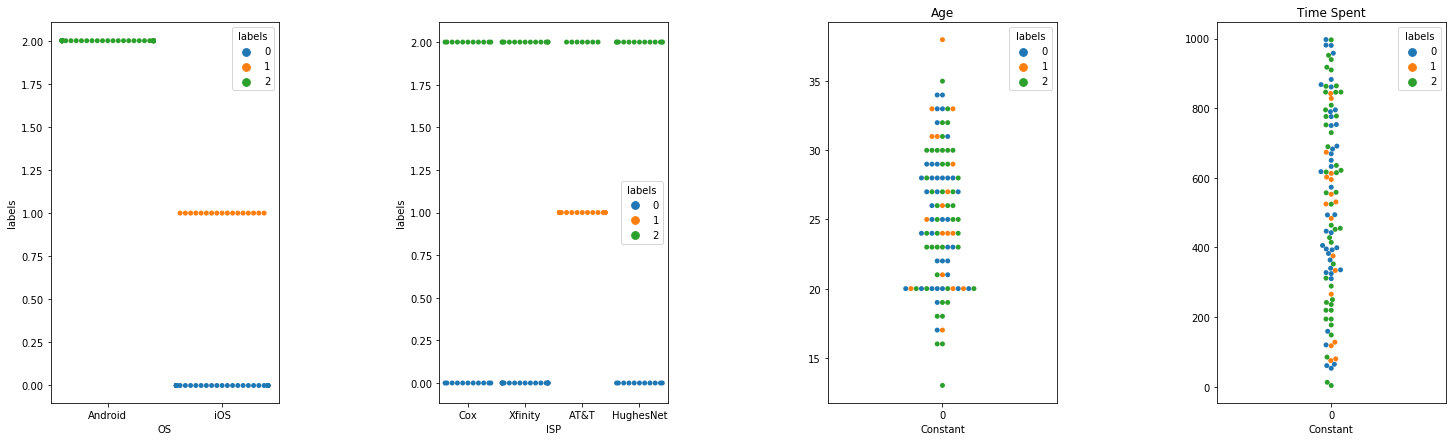

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

labeledCustomers['Constant'] = 0 #dummy feature for plotting

f, axes = plt.subplots(1, 4, figsize=(25, 7), sharex=False)
f.subplots_adjust(hspace=0.2, wspace=0.7)

for i in range(4):
    col = labeledCustomers.columns[i]
    if i < 2:    
        sns.catplot(x=col, y='labels', kind="swarm", hue='labels', data=labeledCustomers,ax=axes[i])
    else:
        ax = sns.swarmplot(x=labeledCustomers['Constant'],y=labeledCustomers[col].values,hue=labeledCustomers['labels'],ax=axes[i])
        ax.set_title(col)
        
plt.close(2)
plt.close(3)
plt.show()